<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a) A system has generated outputs marked by vector ‘d’ in response to inputs which are listed
in vector ‘x’:
d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7972, 11.6371 ] ;
x = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 5.4857, 6 ] ;

  Use the theory of regression to fit a line to this data. Measure the cost function defined asthe mean of squared errors. Plot your data points and the line that models the system’s function.

In [ ]:
# import numpy for calcs and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

In [ ]:
# Input and Target Data
x = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 5.4857, 6 ]
d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7972, 11.6371 ]

# convert to numpy array for ease of use as matrix
x = np.array(x)
d = np.array(d)

In [ ]:
# reshape to allow for matrix multiplication
D = np.reshape(d, (len(d),1))
print(D)

[[ 6.0532]
 [ 7.3837]
 [10.0891]
 [11.0829]
 [13.2337]
 [12.671 ]
 [12.7972]
 [11.6371]]


In [ ]:
X = np.reshape(x, (len(x), 1))
print(X)

[[1.    ]
 [1.7143]
 [2.4286]
 [3.1429]
 [3.8571]
 [4.5714]
 [5.4857]
 [6.    ]]


In [ ]:
X = np.concatenate((X, np.ones_like(X)), 1)
X

array([[1.    , 1.    ],
       [1.7143, 1.    ],
       [2.4286, 1.    ],
       [3.1429, 1.    ],
       [3.8571, 1.    ],
       [4.5714, 1.    ],
       [5.4857, 1.    ],
       [6.    , 1.    ]])

In [ ]:
# Calculate the regression coefficients using formula: beta = (x.T * x)^-1 * x.T * y
B = np.linalg.pinv(X.T @ X) @ X.T @ D
B

array([[1.24435108],
       [6.23214995]])

In [ ]:
# Calculate the predicted values
Y = X @ B
Y

array([[ 7.47650103],
       [ 8.365341  ],
       [ 9.25418098],
       [10.14302095],
       [11.03173649],
       [11.92057647],
       [13.05828666],
       [13.69825642]])

In [ ]:
# calculate the MSE
mse = np.mean((Y - D) ** 2)
mse

1.7872722572247475

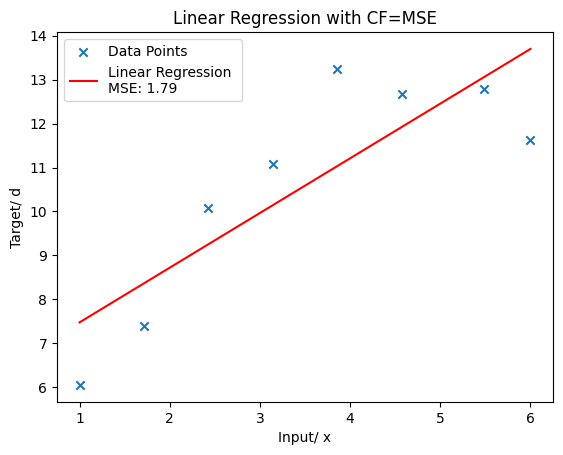

In [ ]:
s# Plot the Regression Line along with the scatter
plt.scatter(x, d, label='Data Points', marker='x')
plt.plot(x, Y, color='red', label=f'Linear Regression \nMSE: {mse:.2f}')
plt.xlabel('Input/ x')
plt.ylabel('Target/ d')
plt.title('Linear Regression with CF=MSE')
plt.legend()
plt.show()

1. b) Use the same data but this time fit a second order polynomial to these data points. What’s the value of your cost function? Plot the second order curve

In [ ]:
X = np.reshape(x, (len(x), 1))
X

array([[1.    ],
       [1.7143],
       [2.4286],
       [3.1429],
       [3.8571],
       [4.5714],
       [5.4857],
       [6.    ]])

In [ ]:
Xsq = np.square(X)
Xsq

array([[ 1.        ],
       [ 2.93882449],
       [ 5.89809796],
       [ 9.87782041],
       [14.87722041],
       [20.89769796],
       [30.09290449],
       [36.        ]])

In [ ]:
# Reshape X according to quadratic

Xq = np.concatenate((Xsq, X, np.ones_like(X)), 1)
Xq

array([[ 1.        ,  1.        ,  1.        ],
       [ 2.93882449,  1.7143    ,  1.        ],
       [ 5.89809796,  2.4286    ,  1.        ],
       [ 9.87782041,  3.1429    ,  1.        ],
       [14.87722041,  3.8571    ,  1.        ],
       [20.89769796,  4.5714    ,  1.        ],
       [30.09290449,  5.4857    ,  1.        ],
       [36.        ,  6.        ,  1.        ]])

In [ ]:
# Calculate the regression coefficients using formula: beta = (x.T * x)^-1 * x.T * y
B = np.linalg.pinv(Xq.T @ Xq) @ Xq.T @ D
B

array([[-0.52837073],
       [ 4.98061174],
       [ 1.09191476]])

In [ ]:
# Calculate the predicted values
Y = Xq @ B
Y

array([[ 5.54415577],
       [ 8.07738862],
       [10.0714461 ],
       [11.5263282 ],
       [12.44194448],
       [12.81855132],
       [12.51384664],
       [11.95423888]])

In [ ]:
# calculate the MSE
mse = np.mean((Y - D) ** 2)
mse

0.22084807053124947

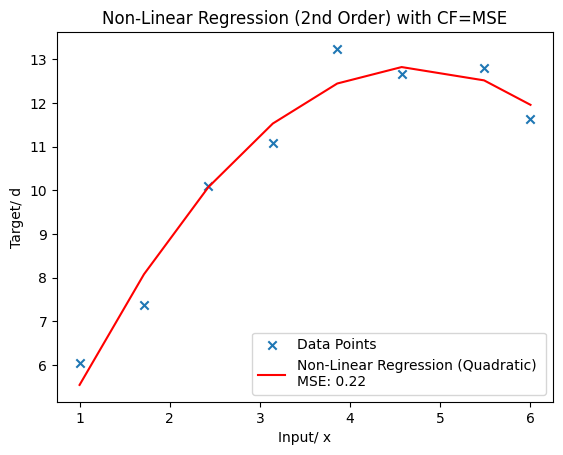

In [ ]:
# Plot the Regression Curve along with the scatter
plt.scatter(x, d, label='Data Points', marker='x')
plt.plot(x, Y, color='red', label=f'Non-Linear Regression (Quadratic) \nMSE: {mse:.2f}')
plt.xlabel('Input/ x')
plt.ylabel('Target/ d')
plt.title('Non-Linear Regression (2nd Order) with CF=MSE')
plt.legend()
plt.show()

The curve is not smooth as we don't have intermediary points. If we are to do interpolation to achieve this using matrix multiplication, we essentially have to take guesses at the respective output values which will be unreliable.

1. c) Increase the order of the polynomial to 6 and fit the curve. How much error do you measure this time? Plot the 6th order curve

In [ ]:
# Function that takes input list and order as arg and returns the polynomial matrix
def mat_transform( x, order):
  X = np.reshape(x, (len(x), 1))
  Xp = X
  if order == 1:
    return np.concatenate((Xp, np.ones_like(X)), 1)
  else:
    for i in range(2,order+1):
      Xpp = np.power(X,i)
      Xp = np.concatenate((Xpp, Xp),1)
    Xp = np.concatenate((Xp, np.ones_like(X)), 1)
    return Xp

In [ ]:
# Test the function
print(mat_transform(x, 1))
print()
print(mat_transform(x,3))

[[1.     1.    ]
 [1.7143 1.    ]
 [2.4286 1.    ]
 [3.1429 1.    ]
 [3.8571 1.    ]
 [4.5714 1.    ]
 [5.4857 1.    ]
 [6.     1.    ]]

[[  1.           1.           1.           1.        ]
 [  5.03802682   2.93882449   1.7143       1.        ]
 [ 14.32412071   5.89809796   2.4286       1.        ]
 [ 31.04500177   9.87782041   3.1429       1.        ]
 [ 57.38292684  14.87722041   3.8571       1.        ]
 [ 95.53173645  20.89769796   4.5714       1.        ]
 [165.08064616  30.09290449   5.4857       1.        ]
 [216.          36.           6.           1.        ]]


In [ ]:
# Transformed input matrix for 6th order
Xp = mat_transform(x,6)

In [ ]:
# Calculate the regression coefficients using formula: beta = (x.T * x)^-1 * x.T * y
B = np.linalg.pinv(Xp.T @ Xp) @ Xp.T @ D
B

array([[-0.00747583],
       [ 0.13410631],
       [-0.86595389],
       [ 2.2005257 ],
       [-1.05650667],
       [-0.59818281],
       [ 6.22958284]])

In [ ]:
# Calculate the predicted values
Y = Xp @ B
Y

array([[ 6.03609566],
       [ 7.50237525],
       [ 9.7377163 ],
       [11.65610458],
       [12.68395739],
       [12.96473647],
       [12.70495017],
       [11.66196464]])

In [ ]:
# calculate the MSE
mse = np.mean((Y - D) ** 2)
mse

0.10800458701012589

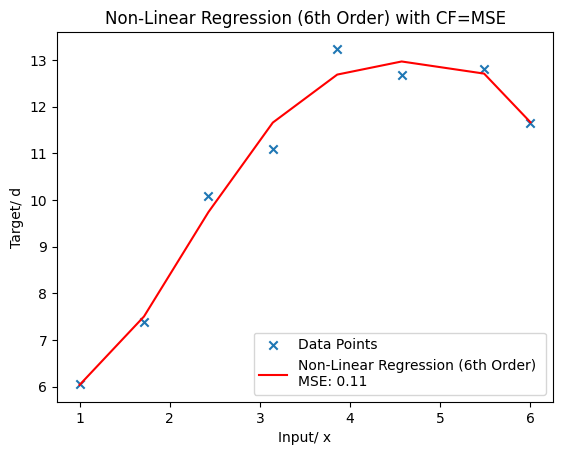

In [ ]:
# Plot the Regression Curve along with the scatter
plt.scatter(x, d, label='Data Points', marker='x')
plt.plot(x, Y, color='red', label=f'Non-Linear Regression (6th Order) \nMSE: {mse:.2f}')
plt.xlabel('Input/ x')
plt.ylabel('Target/ d')
plt.title('Non-Linear Regression (6th Order) with CF=MSE')
plt.legend()
plt.show()

1. d) Remove one data point (d: 12.7772, x: 5.2857) from your set. Once again fit the 6th orderpolynomial. After finding the polynomial bring that data point back and once again measure the cost function for all data points. How much the value of the cost function changed compared to the 6th order polynomial where all data points were used for curve fitting? Is the 6th order polynomial a case of over fitting? Plot the new 6th order curve.

In [ ]:
d[6], x[6]

(12.7972, 5.4857)

In [ ]:
# delete the data points
xn = np.delete(x,6)
dn = np.delete(d,6)

In [ ]:
# reshape to allow for matrix multiplication
Dn = np.reshape(dn, (len(dn),1))
print(Dn)

[[ 6.0532]
 [ 7.3837]
 [10.0891]
 [11.0829]
 [13.2337]
 [12.671 ]
 [11.6371]]


In [ ]:
# Transformed input matrix for 6th order
Xp = mat_transform(xn,6)

# Calculate the regression coefficients using formula: beta = (x.T * x)^-1 * x.T * y
B = np.linalg.pinv(Xp.T @ Xp) @ Xp.T @ Dn

# Calculate the predicted values
Y = Xp @ B

# calculate the MSE
mse = np.mean((Y - Dn) ** 2)
mse

6.752185545330081e-12

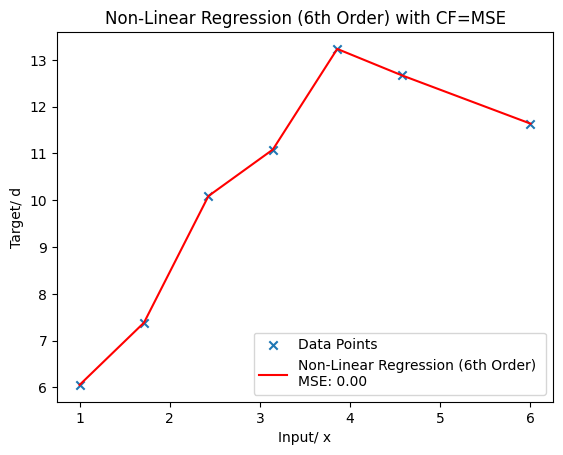

In [ ]:
# Plot the Regression Curve along with the scatter
plt.scatter(xn, dn, label='Data Points', marker='x')
plt.plot(xn, Y, color='red', label=f'Non-Linear Regression (6th Order) \nMSE: {mse:.2f}')
plt.xlabel('Input/ x')
plt.ylabel('Target/ d')
plt.title('Non-Linear Regression (6th Order) with CF=MSE')
plt.legend()
plt.show()

In [ ]:
# calculate percentage decrease in mse after removing 7th data-point

(0.10800458701012589-6.752185545330081e-12)*100/0.10800458701012589

99.99999999374825

The 6th order polynomial is displaying a case of overfitting when a single data point is removed. The MSE decrease in comparison to when all the data points were there is approximately 100%.This means that the curve will exactly pass over each of the remaining data points, i.e. overfitting.

1. e) Plot the value of the cost function as a function of the polynomial order (from 1 to 10) using all data points. Based on this curve, which order is suitable for this dataset to avoid over or under fitting

In [ ]:
mse_list = list(range(10))

In [ ]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
def calc_mse(order):
  Xp = mat_transform(x,order)
  B = np.linalg.pinv(Xp.T @ Xp) @ Xp.T @ D
  Y = Xp @ B
  mse = np.mean((Y - D) ** 2)
  return mse

In [ ]:
# Shows that the function works
calc_mse(1), calc_mse(2)

(1.7872722572247475, 0.22084807053124947)

In [ ]:
for i in range(10):
  mse_list[i]=calc_mse(i+1)

mse_list

[1.7872722572247475,
 0.22084807053124947,
 0.14012432434799893,
 0.12330318419215346,
 0.10927899894286866,
 0.10800458701012589,
 0.10501525295354852,
 0.10014651115484678,
 0.14432707476799406,
 0.588575013333937]

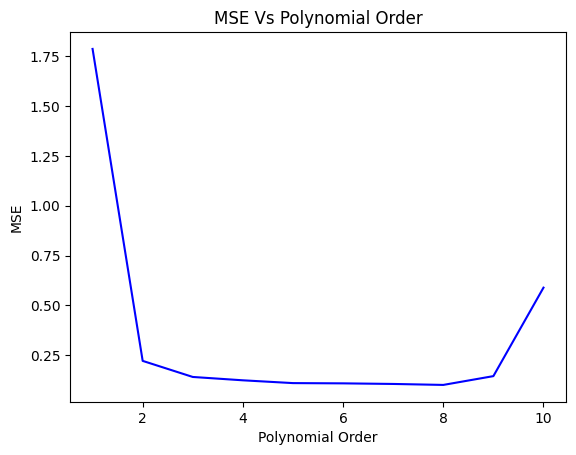

In [ ]:
# Plot the MSE Vs Order curve
plt.plot(list(range(1,11)), mse_list, color='blue')
plt.xlabel('Polynomial Order')
plt.ylabel('MSE')
plt.title('MSE Vs Polynomial Order')
plt.show()

Based on the bias-variance trade-off, the optimal order of the polynomial is the one for which MSE is minimum. From 1-10, the order which leads to the lowest value for MSE is 8. So, order=8 is the optimal value for the given dataset that optimize the fit (avoiding both over and under fitting).

2. Consider a 2-dimensional classification dataset with the given desired values for each point.

x1 = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0];

x2 = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2];

d = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0 ];

Here for (x1=0.5, x2=0.5) the desired value is 0.0 and for (x1=3.0, x2=3.2) the desired value is
1.0.

2. a) Use the logistic regression algorithm to design a supervised classifier that can perfectly separate these two sets. Plot these data points and your decision line

In [ ]:
x1 = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0]

x2 = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2]

d = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

In [ ]:
x1=np.array(x1)
x2=np.array(x2)
d=np.array(d)

In [ ]:
# Formulate the matrices

x1=np.reshape(x1, (len(x1),1))
x2=np.reshape(x2, (len(x2),1))
X = np.concatenate((np.ones_like(x1),x1,x2),1)
X

array([[1. , 0.5, 0.5],
       [1. , 0.8, 0.2],
       [1. , 0.9, 0.9],
       [1. , 1. , 0.8],
       [1. , 1.1, 0.3],
       [1. , 2. , 2.5],
       [1. , 2.2, 3.5],
       [1. , 2.5, 1.8],
       [1. , 2.8, 2.1],
       [1. , 3. , 3.2]])

In [ ]:
# Initialize weights
W = np.zeros(3)

In [ ]:
# Logistic regression hypothesis
def logistic_function(x,w):
  return 1 / (1 + np.exp(-np.dot(x, w)))

In [ ]:
# test the logistic regression function
logistic_function(X,W)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [ ]:
# Logistic Refression Cost function
def logistic_regression_cf(x, w, d):
  return -0.5 * np.sum(d * np.log(logistic_function(x, w)) + (1 - d) * np.log(logistic_function(x, w)))

In [ ]:
# test cost function
logistic_regression_cf(X,W,d)

3.4657359027997265

In [ ]:
# Gradient descent function
def gradient_descent(x, w, d, step_size, iters):
  for i in range(iters):
    gradient = np.dot(x.T, (logistic_function(x, w) - d))*0.5
    w = w - step_size * gradient
  return w

In [ ]:
# Run Gradient Descent to find optimal weights
W_opt = gradient_descent(X, W, d, step_size=0.01, iters=10000)
print(W_opt)

[-8.56439309  2.34992925  3.51266527]


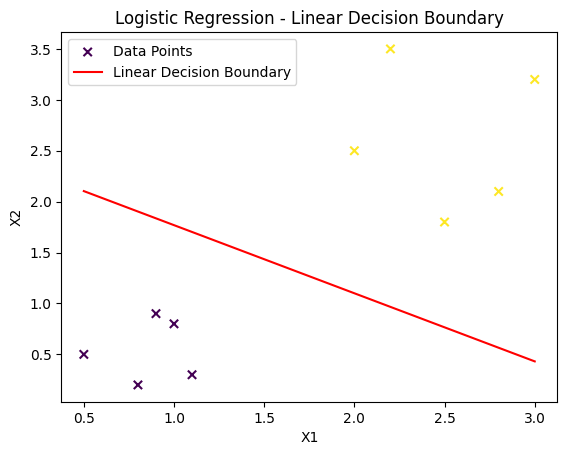

In [ ]:
# Decision boundary equation: w0 + w1*x1 + w2*x2 = 0 => x2 = (-w0 - w1*x1) / w2
db_x1 = np.linspace(0.5, 3.0, 100)
db_x2 = (-W_opt[0] - W_opt[1]*db_x1) / W_opt[2]


# Plot the data points and decision boundary
plt.scatter(x1, x2, c=d, cmap='viridis', label='Data Points', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')

plt.plot(db_x1, db_x2, label='Linear Decision Boundary', color='red')
plt.legend()
plt.title('Logistic Regression - Linear Decision Boundary')

plt.show()

2. b) Increase the order of the decision making curve to 2 and once again use the logistic regression to design the classifier. How do you compare these two classifiers?


In [ ]:
# Stack quadratic components to X
Xq = np.column_stack((X, x1**2, x2**2, x1*x2))
Xq

array([[ 1.  ,  0.5 ,  0.5 ,  0.25,  0.25,  0.25],
       [ 1.  ,  0.8 ,  0.2 ,  0.64,  0.04,  0.16],
       [ 1.  ,  0.9 ,  0.9 ,  0.81,  0.81,  0.81],
       [ 1.  ,  1.  ,  0.8 ,  1.  ,  0.64,  0.8 ],
       [ 1.  ,  1.1 ,  0.3 ,  1.21,  0.09,  0.33],
       [ 1.  ,  2.  ,  2.5 ,  4.  ,  6.25,  5.  ],
       [ 1.  ,  2.2 ,  3.5 ,  4.84, 12.25,  7.7 ],
       [ 1.  ,  2.5 ,  1.8 ,  6.25,  3.24,  4.5 ],
       [ 1.  ,  2.8 ,  2.1 ,  7.84,  4.41,  5.88],
       [ 1.  ,  3.  ,  3.2 ,  9.  , 10.24,  9.6 ]])

In [ ]:
#initialize weights
Wq=np.zeros(6)

In [ ]:
# Run gradient descent function to find optimal weights
Wq_opt = gradient_descent(Xq, Wq, d, step_size=0.01, iters=10000)
Wq_opt

array([-4.73453569, -2.593282  , -1.53963585,  1.32222493,  1.33120345,
        1.57828953])

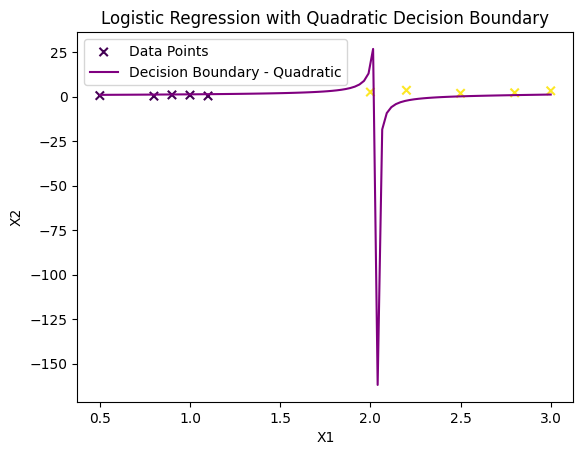

In [ ]:
# Plot the data points and decision boundary for quadratic terms
plt.scatter(x1, x2, c=d, cmap='viridis', label='Data Points', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')

# Decision boundary equation: w0 + w1*x1 + w2*x2 + w3*x1^2 + w4*x2^2 + w5*x1*x2 = 0
# => x2 = (-w0 - w1*x1 - w3*x1^2 - w5*x1*x2) / w2 - w4*x2^2
db_x2q = (-Wq_opt[0] - Wq_opt[1]*db_x1 - Wq_opt[3]*db_x1**2 - Wq_opt[5]*db_x1*db_x2) / (Wq_opt[2] + Wq_opt[4]*db_x2**2)

plt.plot(db_x1, db_x2q, label='Decision Boundary - Quadratic', color='purple')
plt.legend()
plt.title('Logistic Regression with Quadratic Decision Boundary')
plt.show()